Training Accuracy: 0.5456951196996739
Training Classification Report:
              precision    recall  f1-score   support

        hate       0.55      1.00      0.71     17734
     nothate       0.00      0.00      0.00     14764

    accuracy                           0.55     32498
   macro avg       0.27      0.50      0.35     32498
weighted avg       0.30      0.55      0.39     32498


Development Accuracy: 0.5418513047759724
Development Classification Report:
              precision    recall  f1-score   support

        hate       0.54      1.00      0.70      2201
     nothate       0.00      0.00      0.00      1861

    accuracy                           0.54      4062
   macro avg       0.27      0.50      0.35      4062
weighted avg       0.29      0.54      0.38      4062


Test Accuracy: 0.5387644597587989
Test Classification Report:
              precision    recall  f1-score   support

        hate       0.54      1.00      0.70      2189
     nothate       0.00    

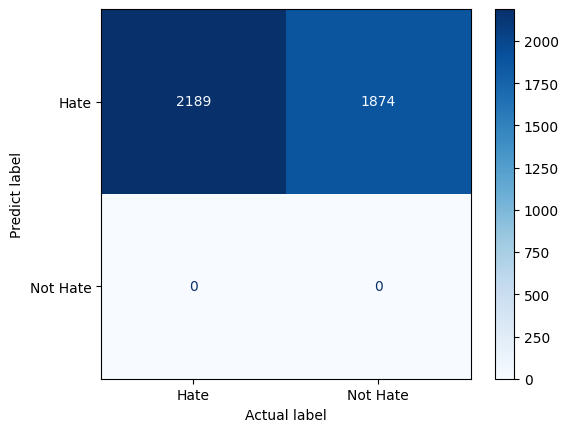

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

data = pd.read_csv('data/dynamically-generated-hate-speech.csv')
data = pd.DataFrame(data, columns=['text', 'label'])

# First, split the data into train (90%) and test (10%)
X_temp, X_test, y_temp, y_test = train_test_split(data['text'], data['label'], test_size=0.1, random_state=42)

# Split the X_temp into train (89% of 90% = 80% of total) and dev (1% of 90% = 10% of total)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)

# Find the majority class label in the training set
majority_class = y_train.value_counts().idxmax()

# Predictions for the training set
y_train_pred = [majority_class] * len(y_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Predictions for the development set
y_dev_pred = [majority_class] * len(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"\nDevelopment Accuracy: {dev_accuracy}")
print("Development Classification Report:")
print(classification_report(y_dev, y_dev_pred))

# Predictions for the test set
y_pred = [majority_class] * len(y_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['hate', 'nothate'])
cm_transposed = cm.T
display = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, display_labels=['Hate', 'Not Hate'])
display.plot(cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predict label')

plt.show()
